In [1]:
from netCDF4 import Dataset
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter

4 files were created by nctoolkit in prior or current sessions. Consider running deep_clean!
nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
os.chdir('/home/users/zy1921/Ind_variables/')
print(os.getcwd())

/home/users/zy1921/Ind_variables


In [3]:
# Load multiple files at once and getting variable names

files = ['Data/Raw/siareas_SImon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc', 
        'Data/Raw/siareas_SImon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc']
nc = nct.open_data(files)
print(nc.variables)

names = ', '.join(files)
print(names)

variable = regex.search(r"(?<=Data/Raw/)[^_]*", names).group()
print(variable)
model = regex.search(r"(?<=Data/Raw/.*?_.*?_)[^_]*", names).group()
print(model)
experiment = regex.search(r"(?<=Data/Raw/.*?_.*?_.*?_)[^_]*", names).group()
print(experiment)

start = 2015
end = 2100

['siareas']
Data/Raw/siareas_SImon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc, Data/Raw/siareas_SImon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc
siareas
CESM2
esm-ssp585


In [7]:
nc.merge("time")
nc.to_nc("Data/{}_{}_{}.nc".format(variable, model, experiment), overwrite = True)

ValueError: b"Warning (cdfInqContents): Coordinates variable time cant be assigned!Warning (cdfInqContents): Coordinates variable time cant be assigned!cdo    mergetime (Abort): Outputfile Data/siareas_CESM2_esm-ssp585.nc already exists!"

## Plotting map

### 2015

In [11]:
data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))
data.select(year = start)
data.tmean()
data.to_nc("Data/{}_{}_{}_{}.nc".format(variable, model, experiment, start), overwrite = True)

In [12]:
file = "Data/{}_{}_{}_{}.nc".format(variable, model, experiment, start)
nc = Dataset(file)
print(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (1,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1, 2)
filling off, 'siareas': <class 'netCDF4._netCDF4.Variable'>
float32 siareas(time)
    standard_name: sea_ice_area
    long_name: Sea-Ice Area South
    units: 1e6 km2
    _FillValue: 1e+20
    missing_value: 1e+20
    cell_methods: area: time: mean
    comment: sum(sum(hemisphere((aice*tarea),dim="nj",dr="<"),"ni"),"nj")
    description: total area of sea ice in the Southern hemisphere
    frequency: mon
    id: siareas
    mipTable: SImon
    out_name: siareas
    prov: SIMIP [seaicemon]
    realm: seaIce
    time: time
    time_label: time-mean
    time_title: Temporal mean
    title: Sea-Ice Area South
    type: r

## Time series

In [8]:
# Join the two files with time 

data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))

print(data.variables_detailed)

time = data.years
time = tuple(time)
len(time)

  variable  levels  points           long_name    units
0  siareas       1       1  Sea-Ice Area South  1e6 km2


86

In [13]:
!cdo -yearmean Data/{variable}_{model}_{experiment}.nc Data/{variable}_{model}_{experiment}_mean.nc

cdo    yearmean: Processed 1 variable over 1117 timesteps [0.16s 169MB].


In [4]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_mean.nc".format(variable, model, experiment))
print(nc.variables)
var_mean = nc.variables[variable][:]
print(var_mean.shape)
time_mean= nc.variables['time'][:]

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (86,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (86, 2)
filling off, 'siareas': <class 'netCDF4._netCDF4.Variable'>
float32 siareas(time)
    standard_name: sea_ice_area
    long_name: Sea-Ice Area South
    units: 1e6 km2
    _FillValue: 1e+20
    missing_value: 1e+20
    cell_methods: area: time: mean
    comment: sum(sum(hemisphere((aice*tarea),dim="nj",dr="<"),"ni"),"nj")
    description: total area of sea ice in the Southern hemisphere
    frequency: mon
    id: siareas
    mipTable: SImon
    out_name: siareas
    prov: SIMIP [seaicemon]
    realm: seaIce
    time: time
    time_label: time-mean
    time_title: Temporal mean
    title: Sea-Ice Area South
    type:

In [16]:
!cdo -yearmax Data/{variable}_{model}_{experiment}.nc Data/{variable}_{model}_{experiment}_max.nc
!cdo -yearmin Data/{variable}_{model}_{experiment}.nc Data/{variable}_{model}_{experiment}_min.nc

cdo    yearmax: Processed 1 variable over 1117 timesteps [0.16s 170MB].
cdo    yearmin: Processed 1 variable over 1117 timesteps [0.13s 170MB].


In [5]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_min.nc".format(variable, model, experiment))
             
var_min = nc.variables[variable][:]
time_min= nc.variables['time'][:]

In [6]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_max.nc".format(variable, model, experiment))
             
var_max = nc.variables[variable][:]
time_max= nc.variables['time'][:]
var_max[1]

13.961336

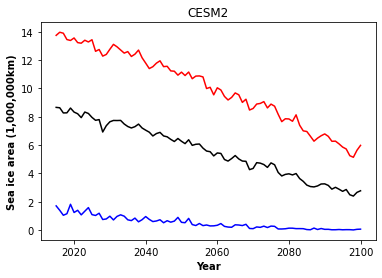

In [9]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
ax.plot(time, var_max, 'r')
ax.plot(time, var_min, 'b')

ax.title.set_text("{}".format(model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Sea ice area (1,000,000km)")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection.png".format(variable, model, experiment))

plt.show()